## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

Распознавание рукописного ввода на примере базы MNIST

Построить классификатор изображений рукописного ввода на базе MNIST. В качестве шаблона в данной работе можно использовать ipython-ноутбук 002-digit.ipynb.

Классификатор предлагается строить на признаках, полученных в результате предобработки изображений, например, гистограммы градиентов (HOG) или результат PCA преобразования.

В качестве модели классификатора можно использовать любую известную Вам модель, за исключением сверточных нейронных сетей.

Критерием качества классификатора является метрика accuracy. Для получения зачета по данной работе, значение метрики accuracy должно быть больше 0.6. Метрика оценивается на тестовой выборке в рамках контеста Digit Recognizer на Kaggle.

Решение необходимо предоставить в виде ipython-ноутбука с реализацией процесса построения модели и скриншота с финальным результатом на Kaggle.

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Загружаем исходные данные

In [2]:
train = np.loadtxt('../002/data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('../002/data/digit/test.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
train = train[:, 1:]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train, (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [4]:
train_img.shape, train.shape, test.shape

((42000, 28, 28), (42000, 784), (28000, 784))

## Визуализируем исходные данные

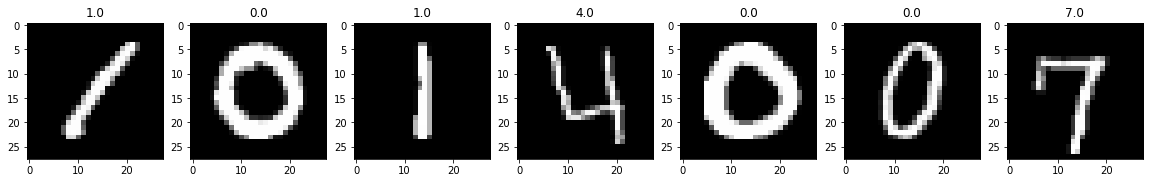

In [101]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[:7], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train, x_val, y_train, y_val = train_test_split(
    train, train_label, test_size=0.2,
    random_state=42)

### 1) Для начала попробуем логистичесую регрессию на сырых данных.

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [105]:
clf_lr = LogisticRegression(solver='saga', n_jobs=-1)

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_val_sc = scaler.transform(x_val)

In [108]:
clf_lr.fit(x_train_sc, y_train)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
y_val_lr = clf_lr.predict(x_val_sc)

In [110]:
accuracy_score(y_val, y_val_lr)

0.8958333333333334

In [111]:
confusion_matrix(y_val, y_val_lr)

array([[788,   0,   2,   0,   4,   8,   7,   0,   6,   1],
       [  0, 889,   4,   1,   1,   2,   1,   1,   9,   1],
       [  6,  20, 724,  17,  18,   4,  19,  14,  24,   0],
       [  3,   9,  29, 797,   1,  41,   5,  15,  23,  14],
       [  1,   6,   6,   2, 779,   3,   7,   2,   4,  29],
       [ 15,   7,   4,  22,  13, 590,  25,   8,  13,   5],
       [  8,   6,   3,   1,  10,   9, 743,   1,   4,   0],
       [  2,  22,   9,   3,  17,   3,   1, 797,   0,  39],
       [  6,  38,   6,  21,  20,  26,   7,   6, 695,  10],
       [ 12,   4,   2,  15,  29,   7,   0,  39,   7, 723]])

Получился довольно неплохой результат.

### 2) Попробуем также на сырых данных RandomForestClassifier.

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
clf_rfc = RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [114]:
clf_rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [115]:
y_val_rfc = clf_rfc.predict(x_val)

In [116]:
accuracy_score(y_val, y_val_rfc)

0.9641666666666666

In [117]:
confusion_matrix(y_val, y_val_rfc)

array([[806,   0,   1,   0,   1,   1,   4,   0,   2,   1],
       [  0, 900,   4,   1,   1,   1,   1,   1,   0,   0],
       [  3,   3, 813,   3,  10,   0,   5,   4,   5,   0],
       [  2,   1,   6, 883,   2,  12,   0,   9,  12,  10],
       [  1,   0,   1,   0, 813,   0,   6,   1,   2,  15],
       [  1,   1,   2,   7,   1, 670,   8,   1,   5,   6],
       [  3,   1,   0,   0,   2,   2, 772,   0,   5,   0],
       [  1,   3,  10,   1,   5,   1,   0, 854,   2,  16],
       [  1,   4,   2,   8,   5,   4,   3,   2, 798,   8],
       [  2,   4,   2,  15,   9,   6,   0,   6,   4, 790]])

Получилось еще лучше.

### 3) Попробуем KNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
clf_knn = KNeighborsClassifier(n_jobs=-1)

In [120]:
clf_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [121]:
y_val_knn = clf_knn.predict(x_val)

In [122]:
accuracy_score(y_val, y_val_knn)

0.9648809523809524

In [123]:
confusion_matrix(y_val, y_val_knn)

array([[812,   0,   0,   0,   0,   0,   4,   0,   0,   0],
       [  0, 906,   0,   0,   0,   0,   3,   0,   0,   0],
       [  6,  15, 796,   3,   2,   2,   1,  20,   1,   0],
       [  2,   4,   4, 900,   0,   9,   1,   6,   5,   6],
       [  1,   5,   0,   0, 811,   0,   3,   1,   0,  18],
       [  1,   2,   0,  15,   1, 669,   9,   0,   1,   4],
       [  5,   0,   0,   0,   0,   3, 777,   0,   0,   0],
       [  0,  18,   2,   0,   1,   0,   0, 857,   0,  15],
       [  1,  12,   2,  12,   3,  15,   4,   1, 777,   8],
       [  3,   3,   1,  10,   6,   1,   0,  12,   2, 800]])

Остановимся на модели RandomForestClassifier, т.к. KNN рассчитывался медленней.

## Вычисляем X и Y составляющие градиента с помощью оператора Собеля

In [61]:
train_sobel_x = np.zeros_like(train_img)
train_sobel_y = np.zeros_like(train_img)
for i in range(len(train_img)):
    train_sobel_x[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=1, dy=0, ksize=5)
    train_sobel_y[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=0, dy=1, ksize=5)

In [62]:
train_sobel_x.shape, train_sobel_y.shape

((42000, 28, 28), (42000, 28, 28))

In [63]:
test_sobel_x = np.zeros_like(test_img)
test_sobel_y = np.zeros_like(test_img)
for i in range(len(test_img)):
    test_sobel_x[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=1, dy=0, ksize=5)
    test_sobel_y[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=0, dy=1, ksize=5)

In [64]:
train_g, train_theta = cv2.cartToPolar(train_sobel_x, train_sobel_y)

In [65]:
test_g, test_theta = cv2.cartToPolar(test_sobel_x, test_sobel_y)

In [66]:
train_g.shape, train_theta.shape, test_g.shape, test_theta.shape

((42000, 28, 28), (42000, 28, 28), (28000, 28, 28), (28000, 28, 28))

In [67]:
# Гистограммы вычисляются с учетом длины вектора градиента
train_hist = np.zeros((len(train_img), 15))
for i in range(len(train_img)):
    hist, borders = np.histogram(train_theta[i],
                                 bins=15,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i])
    train_hist[i] = hist

In [68]:
test_hist = np.zeros((len(test_img), 15))
for i in range(len(test_img)):
    hist, borders = np.histogram(test_theta[i],
                                 bins=15,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i])
    test_hist[i] = hist

In [69]:
# По умолчанию используется L2 норма
train_hist = train_hist / np.linalg.norm(train_hist, axis=1)[:, None]

In [70]:
test_hist = test_hist / np.linalg.norm(test_hist, axis=1)[:, None]

In [71]:
train_hist.shape, test_hist.shape

((42000, 15), (28000, 15))

In [72]:
def quadrant(img, g, theta):
    '''
    Функция генерирующая 12 новых фичей.
    Изображение цифры делится на четыре равных 
    квадрата и для каждого из них считается доля
    суммарной яркости всех пикселей относительно
    суммарной яркости пикслелей всего изображения.
    Аналогичные расчеты производятся для матрицы градиентов
    и углов.
    '''
    quadrant = np.empty((img.shape[0], 12))
    for i in range(img.shape[0]):        
        for j, item in zip(range(0,9,4), [img, g, theta]):
            full_sum = item[i].sum()
            quadrant[i, j] = item[i][:14, :14].sum() / full_sum
            quadrant[i, j+1] = item[i][:14, 14:].sum() / full_sum
            quadrant[i, j+2] = item[i][14:, :14].sum() / full_sum
            quadrant[i, j+3] = item[i][14:, 14:].sum() / full_sum
        
    return quadrant

In [73]:
quadrant_train = quadrant(train_img, train_g, train_theta)
quadrant_test = quadrant(test_img, test_g, test_theta)

In [74]:
# сгенерируем индексы для обучающего и валидационного наборов.
np.random.seed(42)
train_size = int(0.8*train.shape[0])
ids = np.random.permutation(train.shape[0])
train_ids = ids[:train_size]
val_ids = ids[train_size:]

In [75]:
train[train_ids].shape, train[val_ids].shape

((33600, 784), (8400, 784))

In [23]:
np.random.seed(42)
clf_rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)

In [24]:
# Уменьшим размерность нашего датасета.
# Попробуем подобрать оптимальное количество компонент для PCA разложения.
pca_components = [20, 30, 40, 50, 75, 100, 125, 150]

In [25]:
from sklearn.decomposition import PCA

In [26]:
# т.к. кросс-валидация вылетала с memory error, 
# то пришлось подбирать количество компонент 
# на обучающем наборе с проверкой на валидационном.
result = []
scaler = StandardScaler(with_std=False)
train_sc = scaler.fit_transform(train[train_ids])
val_sc = scaler.transform(train[val_ids])
for n in pca_components:
    pca = PCA(n_components=n)
    train_pca = pca.fit_transform(train_sc)
    val_pca = pca.transform(val_sc)
    clf_rfc.fit(train_pca, train_label[train_ids])
    y_pca = clf_rfc.predict(val_pca)
    result.append((n, accuracy_score(train_label[val_ids], y_pca)))

In [27]:
result

[(20, 0.9473809523809524),
 (30, 0.9538095238095238),
 (40, 0.9527380952380953),
 (50, 0.9528571428571428),
 (75, 0.9522619047619048),
 (100, 0.9492857142857143),
 (125, 0.9485714285714286),
 (150, 0.9463095238095238)]

In [76]:
# примем количество компонент равное 30
n = 30

In [77]:
pca = PCA(n_components=n)
train_pca = pca.fit_transform(train_sc)
val_pca = pca.transform(val_sc)

In [78]:
val_pca.shape

(8400, 30)

In [79]:
# соединим исходный датасет с уменьшенной размерностью вместе со сгенерированными 
# признаками train_hist и quadrant_train
X_train = np.c_[(train_pca, train_hist[train_ids], quadrant_train[train_ids])]
X_val = np.c_[(val_pca, train_hist[val_ids], quadrant_train[val_ids])]

In [80]:
# всего получилось 57 признаков, что существенно меньше исходного
# количества - 784
X_train.shape, X_val.shape

((33600, 57), (8400, 57))

In [81]:
# обучим RandomForestClassifier на уменьшенном количестве признаков.
np.random.seed(42)
clf_rfc = RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [82]:
clf_rfc.fit(X_train, train_label[train_ids])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [83]:
y_val_rfc = clf_rfc.predict(X_val)

In [84]:
# Процент правильно угаданных меток, лишь немного уступает
# модели, обученной на 784 признаках.
accuracy_score(train_label[val_ids], y_val_rfc)

0.9638095238095238

In [85]:
confusion_matrix(train_label[val_ids], y_val_rfc)

array([[786,   1,   0,   0,   0,   0,   7,   1,   3,   0],
       [  0, 907,   5,   3,   1,   0,   2,   1,   0,   1],
       [  2,   0, 774,  12,   1,   2,   1,   3,   1,   1],
       [  0,   0,  15, 822,   0,   5,   1,   5,   7,   3],
       [  0,   1,   1,   0, 784,   0,   9,   3,   0,  15],
       [  0,   0,   4,  18,   3, 739,   2,   0,   4,   2],
       [  2,   1,   3,   0,   0,   6, 834,   0,   3,   0],
       [  0,   4,  16,   3,   3,   0,   0, 889,   1,  13],
       [  3,   6,   3,  16,   2,   8,   3,   1, 762,   6],
       [  5,   0,   2,   5,  17,   4,   2,  12,   8, 799]])

In [86]:
# обучим модель на всем датасете, используя 57 признаков.
scaler = StandardScaler(with_std=False)
train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)
pca = PCA(n_components=n)
train_pca = pca.fit_transform(train_sc)
test_pca = pca.transform(test_sc)

In [87]:
X = np.c_[(train_pca, train_hist, quadrant_train)]
X_test = np.c_[(test_pca, test_hist, quadrant_test)]

In [88]:
np.random.seed(42)
clf_rfc = RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [89]:
clf_rfc.fit(X, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [90]:
y_sub_rfc = clf_rfc.predict(X_test)

In [ ]:
# также обучим модель на всем датасете используя 784 признака, чтобы сравнить результаты.

In [91]:
np.random.seed(42)
clf_rfc_2 = RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [92]:
clf_rfc_2.fit(train, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [93]:
y_sub_rfc_2 = clf_rfc_2.predict(test)

## Готовим файл для отправки

In [96]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_sub_rfc, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [97]:
with open('submit_2.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_sub_rfc_2, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [98]:
!head submit.txt

ImageId,Label
1,2
2,0
3,9
4,9
5,3
6,7
7,0
8,3
9,0


In [99]:
from IPython.display import Image

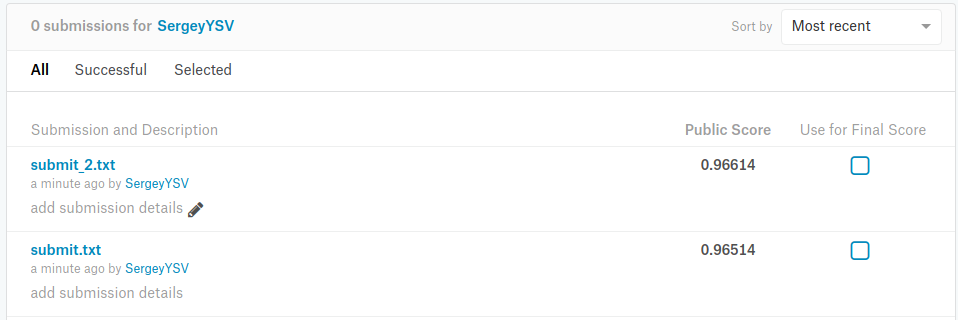

In [100]:
Image(filename='Screenshot_kaggle.png')

Также как и на валидационном наборе, модель, обученная на 784 признаках, немного точнее модели, обученной на 57 признаках: 0.96614 против 0,96514.